In [0]:
# Name:Diana Olivas
# I worked on this code with:

# Please do all of your work for this week's lab in this worksheet. If
# you wish to create other worksheets for scratch work, you can, but
# this is the one that will be graded. You do not need to do anything
# to turn in your lab. It will be collected by your TA at the beginning
# of (or right before) next week’s lab.

# Be sure to clearly label which question you are answering as you go and to
# use enough comments that you and the grader can understand your code.


In [3]:
#Exercise 1
var ("x,y")
plot3d(x^2+ y^2, (x, -5,5), (y, -5,5), aspect_ratio= [1,1,.1])

Graphics3d Object

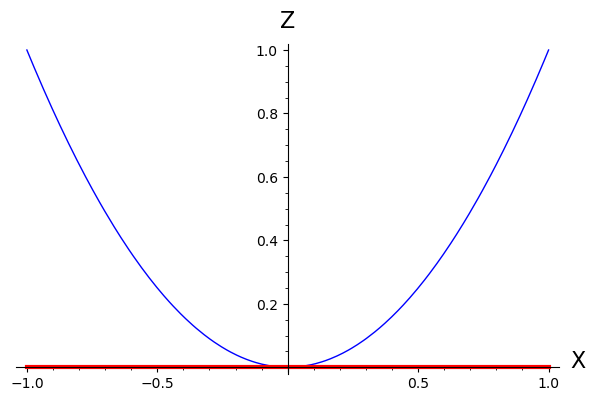

In [4]:
# Exercise 2
#when y=0, f(x,y)= x^2+ y^2 just becomes f(x,y)= x^2. The tangent line is y=0
plot (x^2, axes_labels= ["X", "Z"]) + plot (0, color="red", thickness=3)

In [0]:
# ignore the following used this part for the final

In [15]:
def dde_solve(dde, statevar, delayedvars, history, tmax, timestep):
    # Check validity of delays.
    if min(delayedvars.values()) < 0:
        raise ValueError("This function will not work with negative delays. "
            "Consider consulting a fortune teller instead.")
    if any(val<timestep for val in delayedvars.values()):
        raise ValueError("Time step should not be larger than delay.")

    # Set up variables and delays.

    delayedvars = delayedvars.items()
    dde = dde.subs({v: statevar for v, delay in delayedvars if delay == 0})
    delayedvars = [(v, delay) for v, delay in delayedvars if delay != 0]
    allvars = [str(statevar)] + [str(v) for v, delay in delayedvars]
    delays = [delay for v, delay in delayedvars]

    # Set up fast functions.
    dde_func = fast_float(dde, *allvars)
    history_func = fast_float(history, "t")

    # Adjust the timestep if necessary
    mindelay = min(delays) if delays else timestep
    timestepcorrectionfactor = ceil(timestep / mindelay)
    timestep /= timestepcorrectionfactor

    # A function to perform history lookups.
    def lookup(t):
        """Does a history lookup at each delay from t, stores result in allvars[1:]"""
        for i, delay in enumerate(delays):
            if t - delay <= 0:
                allvars[i+1] = history_func(t - delay)
            else:
                r = (t - delay) / timestep
                n = floor(r)
                r -= n
                allvars[i+1] = result[n]*(1 - r) + result[n + 1]*r

    # Set up for the first iteration.
    result = [history_func(0)]
    lookup(0)
    for t in sxrange(0, tmax - timestep, timestep):
        # Compute k1. Note history lookup has already been done.
        allvars[0] = result[-1]
        k1 = dde_func(*allvars)
        # Compute k2.
        lookup(t + timestep/2)
        allvars[0] += timestep/2 * k1
        k2 = dde_func(*allvars)
        # Compute k3. Note history lookup has already been done.
        allvars[0] = result[-1] + timestep/2 * k2
        k3 = dde_func(*allvars)
        # Compute k4.
        lookup(t + timestep)
        allvars[0] = result[-1] + timestep * k3
        k4 = dde_func(*allvars)
        # Finally, compute the RK4 weighted average.
        result.append(result[-1] + (k1 + 2*k2 + 2*k3 + k4)/6 * timestep)
    return result[::timestepcorrectionfactor]

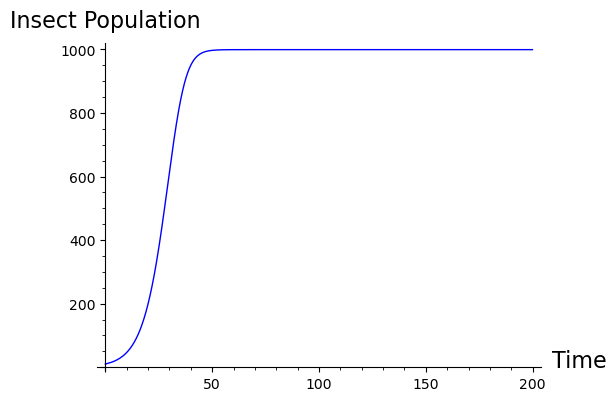

In [16]:
#Create the variables and their values
var("N", "N_tau")
r = 0.2
k = 1000
beta = 0.1

n=10

tau = 1.5
max_time = 200
tstep = 0.1
t = srange(0,max_time,tstep)

Nprime = r*N_tau*(1-(N_tau/k))-beta*(N^n/(1+N^n)) #Create dde
delay = {N_tau: tau}  #Tell the computer what variable is tau
#Simulate and plot
sol=dde_solve(Nprime,N,delay, history = 10, tmax = max_time, timestep = tstep)
list_plot(list(zip(t, sol)), plotjoined = true, axes_labels = ["Time","Insect Population"])

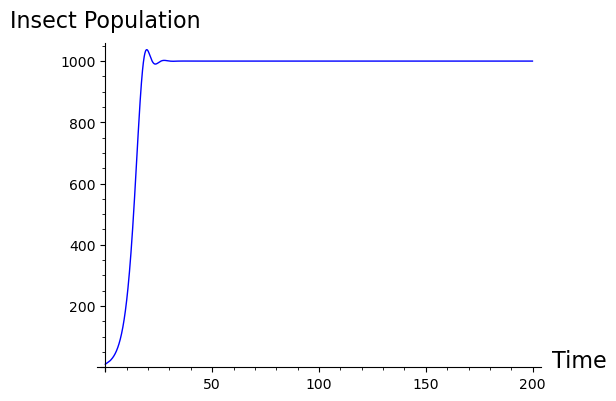

In [26]:
#Create the variables and their values
var("N", "N_tau")
r = 0.5
k = 1000
beta = 0.1

n=10

tau = 1.5
max_time = 200
tstep = 0.1
t = srange(0,max_time,tstep)

Nprime = r*N_tau*(1-(N_tau/k))-beta*(N^n/(1+N^n)) #Create dde
delay = {N_tau: tau}  #Tell the computer what variable is tau
#Simulate and plot
sol=dde_solve(Nprime,N,delay, history = 10, tmax = max_time, timestep = tstep)
list_plot(list(zip(t, sol)), plotjoined = true, axes_labels = ["Time","Insect Population"])

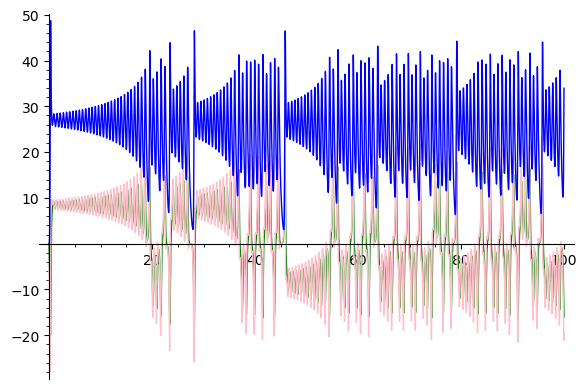

In [42]:
var("J")
var("R")
var("N")
s=10
b=8/3
r=28

t=srange(0,100,0.01)
sol=desolve_odeint([s*(N-J) , r*J-N-R*J,J*N-b*R],ics=[0.1,-6,0.01],dvars=[J,N,R], times=t)
x=list_plot(list(zip(t,sol[:,0])),plotjoined=true, olor="green") + list_plot(list(zip(t,sol[:,1])),plotjoined=true,color="pink")+ list_plot(list(zip(t,sol[:,2])),plotjoined=true,color="blue")
show(x)

In [43]:
t=list_plot(sol,axes_labels=["Juliet","Nurse","Romeo"],plotjoined=True,color="olive")
show(t)

Graphics3d Object

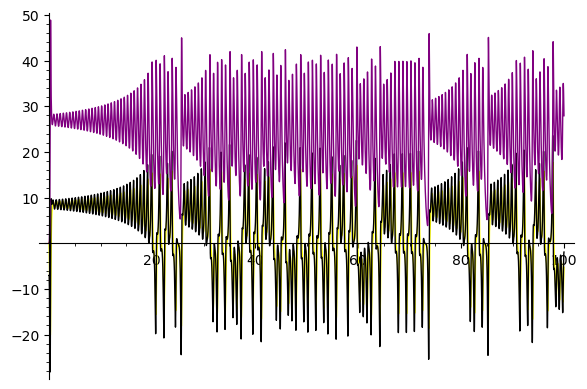

In [53]:
var("J")
var("R")
var("N")
s=10
b=8/3
r=28

t=srange(0,100,0.01)
sol2=desolve_odeint([s*(N-J) , r*J-N-R*J,J*N-b*R],ics=[0.2,-7,0.1],dvars=[J,N,R], times=t)
y=list_plot(list(zip(t,sol2[:,0])),plotjoined=true, color="yellow") + list_plot(list(zip(t,sol2[:,1])),plotjoined=true,color="black")+ list_plot(list(zip(t,sol2[:,2])),plotjoined=true,color="purple")
show(y)

In [47]:
list_plot(sol2,axes_labels=["Juliet","Nurse","Romeo"],plotjoined=True,color="red")

Graphics3d Object

In [48]:
c=list_plot(sol,axes_labels=["Juliet","Nurse","Romeo"],plotjoined=True,color="olive")
d=list_plot(sol2,axes_labels=["Juliet","Nurse","Romeo"],plotjoined=True,color="red")
plot(c+d)

Graphics3d Object

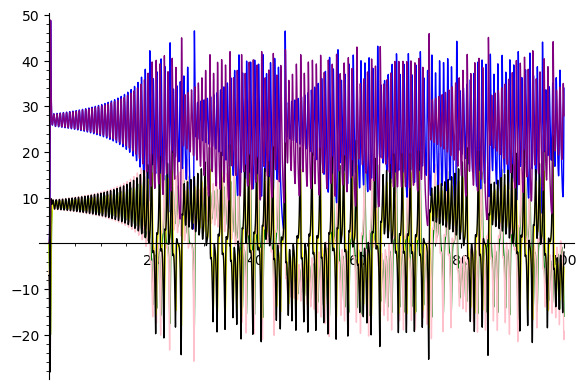

In [58]:
y=list_plot(list(zip(t,sol2[:,0])),plotjoined=true, color="yellow") + list_plot(list(zip(t,sol2[:,1])),plotjoined=true,color="black")+ list_plot(list(zip(t,sol2[:,2])),plotjoined=true,color="purple")
x=list_plot(list(zip(t,sol[:,0])),plotjoined=true, color="green") + list_plot(list(zip(t,sol[:,1])),plotjoined=true,color="pink")+ list_plot(list(zip(t,sol[:,2])),plotjoined=true,color="blue")
show(x+y)

[1.01  0.0  0.0]
[0.09 0.57  0.0]
[0.03 0.07 0.36]

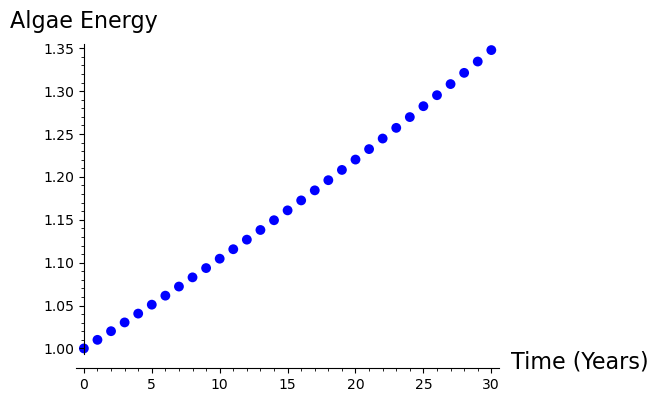

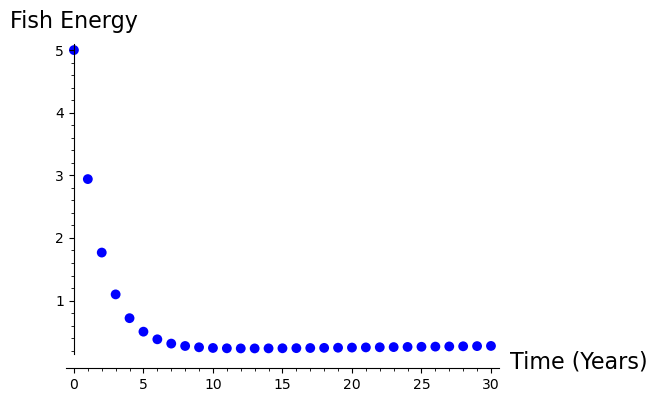

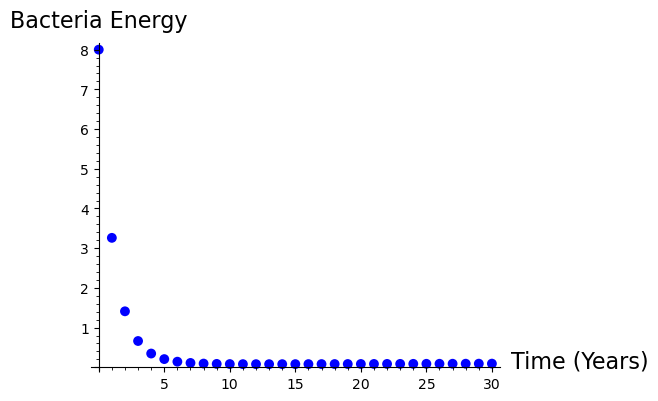

In [59]:
M=zero_matrix(RDF,3,3) # Make zero matrix
M[0,0]=1.01
M[1,0]=0.09
M[1,1]=.57
M[2,0]=.03
M[2,1]=.07
M[2,2]=.36
show(M)

v0 = vector([1,5,8]) #Make initial population vector
A = [v0[0]]                     # for making time series
F = [v0[1]]                     # for making time series
B = [v0[2]]                     # for making time series
for i in srange (0,30):
    v0 = M*v0                       #Multiply current population vector by M
    A.append(v0[0])
    F.append(v0[1])
    B.append(v0[2])
show(list_plot (A, axes_labels = ["Time (Years)","Algae Energy"], size = 50)) #Use list_plot
show(list_plot (F, axes_labels = ["Time (Years)","Fish Energy"], size = 50)) #Use list_plot
show(list_plot (B, axes_labels = ["Time (Years)","Bacteria Energy"], size = 50)) #Use list_plot

In [61]:
show("Eigenvalues:")

'Eigenvalues:'

In [63]:
show(M.eigenvalues())

[0.36, 0.57, 1.01]

In [64]:
max(M.eigenvectors_right())

(1.01, [(0.977536440546463, 0.19995063556632195, 0.06665021185544066)], 1)

In [76]:
d=vector([0.977536440546463, 0.19995063556632195, 0.06665021185544066])
M*(10/0.977536440546463)

[10.332095644796517                0.0                0.0]
[0.9206817901303826  5.830984670825757                0.0]
[0.3068939300434609 0.7160858367680755 3.6827271605215306]

In [75]:
d=vector([0.977536440546463, 0.19995063556632195, 0.06665021185544066])
M*(10/ 0.06665021185544066)

[151.53740279034892                0.0                0.0]
[13.503332921912278  85.52110850544443                0.0]
[  4.50111097397076  10.50259227259844 54.013331687649114]

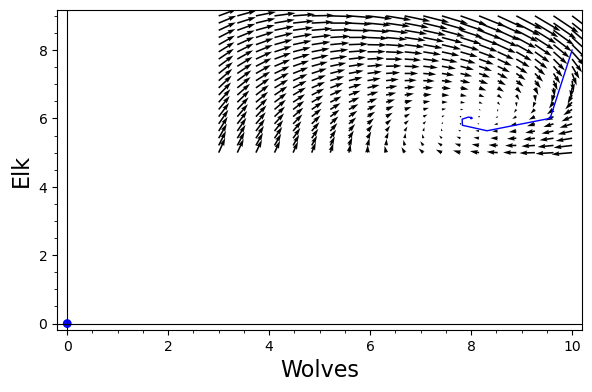

In [14]:
var("W")
var("E")
wolves=2*E*W-4*W-W^2
elk=14*E-E^2-E*W
t=srange(0,100,0.1)
sol3=desolve_odeint([wolves,elk], ics=[10,8], dvars=[W,E], times=t)
x1=sol3[:,0]
y1=sol3[:,1]
plot_vector_field([wolves,elk], (W, 3, 10), (E, 5, 9), axes_labels=["Wolves","Elk"])+point([0,0],size=40, color="blue")+list_plot(list(zip(x1,y1)), plotjoined=true)

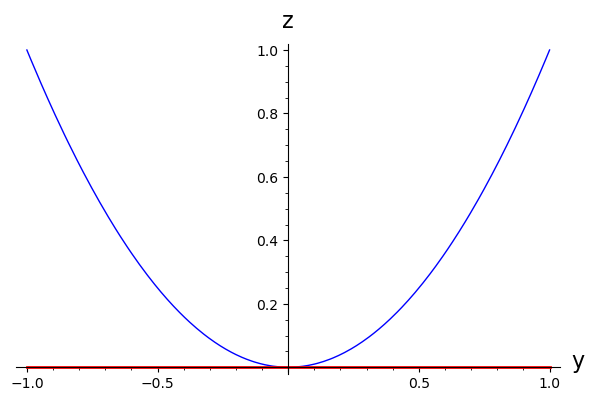

In [5]:
#Exercise 3
plot(y^2, axes_labels=("y","z")) + plot(0, color="red",thickness=2)

In [7]:
#Exercise 4
k_1=0
k_2=0
plot3d(x^2+y^2, (x,-1,1), (y,-1,1)) + plot3d(k_1*x+k_2*y, (x,-1,1), (y,-1,1), color="yellow")

Graphics3d Object

In [8]:
#Exercise 5
k_1=2
k_2=-1
plot3d(k_1*(x-2)+k_2*(y-3)-7, (x,-10,10),(y,-10,10)) + point3d((2,3,-7),color="blue",size=10)

Graphics3d Object

In [9]:
#Exercise 6
var("y")
k_1=2
k_2=-2
plot3d(x^2+y^2, (x,-5,5), (y,-5,5)) + plot3d(k_1*(x-1)+k_2*(y+1)+2, (x,-5,5),(y,-5,5), opacity=0.5) + point3d((1,-1,2),color="red")

Graphics3d Object

In [11]:
#Exercise 7
k_1=8
k_2=-4
plot3d(3*x^2-2*y, (x,-3,3), (y,-3,3)) + point3d((1,1,1), color="red") + plot3d(k_1*(x-1)+k_2*(y-1)+1, (x,-3,3),(y,-3,3), opacity=0.5, color="orange")

Graphics3d Object

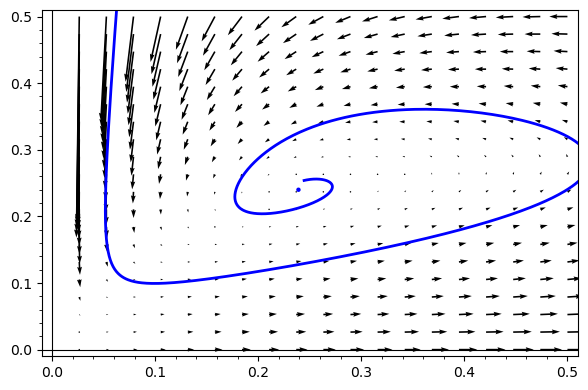

In [13]:
#Exercise 8
var("x","y")
t=srange(0,100,0.1)
sol=desolve_odeint([0.2*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))], ics=[3,4],dvars=[x,y],times=t)
r=0.2
plot_vector_field([r*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))], (x,0,0.5), (y,0,0.5)) + point((0.239,0.24)) + list_plot(list(zip(sol[:,0],sol[:,1])),ymax=0.5,xmax=0.5, plotjoined=True,thickness=2)
#The equilibrium is stable spiral

In [14]:
#Exercise 9
var("x","y")
r=0.2
j = jacobian([r*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))],[x,y])
show(j)

[-0.0571428571428571*x - y/(x + 1) + x*y/(x + 1)^2 + 0.200000000000000                                                            -x/(x + 1)]
[                                                         1/10*y^2/x^2                                                       -1/5*y/x + 1/10]

In [15]:
#Exercise 10
j_1=j.subs({x:0.239, y:0.24})
show(j_1)
j_1.eigenvalues()
#The eigenvalues are both complex numbers with negative real parts, therefore the equilibirum points are both stable spirals

[0.0300033894396598 -0.192897497982244]
[ 0.100838570753313 -0.100836820083682]

[-1/27240646557740*I*sqrt(11258216119645872304850111) - 2336015071/65957981980,
 1/27240646557740*I*sqrt(11258216119645872304850111) - 2336015071/65957981980]

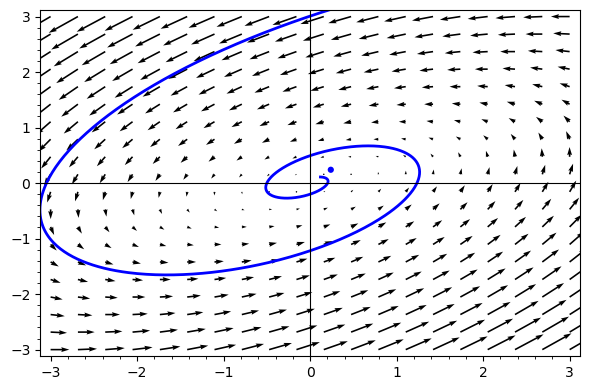

In [18]:
#Exercise 11
t=srange(0,100,0.1)
sol=desolve_odeint([0.0300033894396598*x-0.192897497982244*y, 0.100838570753313*x-0.100836820083682*y], ics=[3,4],dvars=[x,y],times=t)
plot_vector_field([0.0300033894396598*x-0.192897497982244*y, 0.100838570753313*x-0.100836820083682*y], (x,-3,3), (y,-3,3)) + point((0.239,0.24),size=20) + list_plot(list(zip(sol[:,0],sol[:,1])),ymin=-3,ymax=3,xmin=-3,xmax=3, plotjoined=True,thickness=2)
#The jacobian vector field is the same as the nonlinear system - a stable spiral - around the equilibrium point (0.239,0.24)

In [19]:
#Exercise 12
var("x,y")
r = 0.5
t=srange(0,100,0.1)
sol=desolve_odeint([r*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))], ics=[3,4],dvars=[x,y],times=t)
plot_vector_field([r*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))], (x,0,5), (y,0,5)) + point((0.796, 0.796), size=20) + list_plot(list(zip(sol[:,0],sol[:,1]),ymax=4,xmax=3, plotjoined=True,thickness=2)
#The equilibrium point is an unstable point due to a Hopf bifurcation as r increased from 0.2 to 0.5

J = jacobian([r*x*(1-(x/7))-(x/(1+x))*y, (1/10)*y*(1-(y/x))],[x,y])
show(J)
J_1=J.subs({x:0.796, y:0.796})
show(J_1)
J_1.eigenvalues()
#The eigenvalues are complex numbers with positive real parts, making the equilibirum points are both unstable spirals

sol1=desolve_odeint([0.139511144715127*x-0.443207126948775*y, 0.1*x-0.1*y], ics=[3,4],dvars=[x,y],times=t)
plot_vector_field([0.139511144715127*x-0.443207126948775*y, 0.1*x-0.1*y], (x,-10,10), (y,-10,10)) + point((0.796, 0.796), size=20) + list_plot(list(zip(sol1[:,0],sol1[:,1])),ymin=-10,ymax=10,xmin=-10,xmax=10, plotjoined=True,thickness=2)
#The Jacobian vector field is the same as the nonlinear system, an unstable spiral,around the equilibrium point (0.796, 0.796)

SyntaxError: invalid syntax (<ipython-input-19-996360799e62>, line 9)

In [0]:
Var(W)
